## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

<u>ANSWER:</u> 

In my opinion, the analytical approach for the Wine quality project is **Predictive** and **Descriptive** approach.

**Predictive Approach:** We will be enumerating various probabilities that corresponds to a grade/quality of wine.  
**Descriptive Approach:** Also, exhibiting relationship between the features and quality of a wine.  
***


### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**



***
<u>ANSWER:</u> 
We require data which has the right **composition** of contents in the red wine to predict a wine quality and show the relationship between them.
***

### Data Collection

**Q3. From where do we get our data?**
***
<u>ANSWER:</u> 
We can get our data from quality surveys conducted in the wine manufacturing/research units and quantitative laboratory data obtained from a wine. 

***


### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

<u>ANSWER:</u> The dataset used for prediction are obtained from the variants of Portuguese "Vinho Verde" wine.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**


<u>ANSWER:</u>  
* Understand the grades better.
* Enrich the quality of wine.
* Produce and promote more specialized wine grades.
* Research purposes to understand the nutrition facts of wine.
* Advertise for selling
* Health benefits can be protrayed for better selling and transparency along with identifying allergic reaction/target customers that avoid wine due to particular content of wine. eg., Bread that comes gluten free for special category.
* Explore usage of wine in various other departments such as cosmetic industry, medicinal purposes.






<hr style="border:.03px  solid black"> </hr>

### TABLE OF CONTENTS
    
1. [Importing the libraries](#lib_import)
2.[Exploring the 'Wine' Dataset](#explore-ds)
3.[Data Preparation](#data_prep)
    * [Check for null values](#null)
    *[Check for outliers](#outliers)
    *[Correlation heatmap](#heatmap)
    *[Target variable distribution](#imb)
    *[Check the distribution of data using histograms](#hist)

4. [Mutiple linear Regression Assumptions](#mlpa)
    * [All variables are continuous numeric and free from outliers](#1LR)
    * [Linear realtionship between the predictors and predictant](#ScatterPlot)
    * [Multivariate Normality–residuals are normally distributed](#boxcox)
    * [All predictors are independent of each other(multicollinearity)](#VIF)
    * [Homoscadecity](#homosceda)

5. [Data Modelling](#dm)
    * [Train_test_split](#tts)
    * [Standardizing the features](#scal)
    * [Cross Validation](#cv)
    * [Implementing the Linear Models](#lm)
    

6. [Model Evaluation](#me)
    * [Evaluating Model performance](#emp)
    * [Feature Importance](#fi)
    * [Visualizing features based on Feature Importance](#vfi)
    

7. [Conclusion](#cln)
8.[Overall Observation](#ob)

    



<hr style="border:.1px  solid  gray"> </hr>

## <CENTER> IMPORTING THE LIBRARIES<a name="lib_import"></a>


<hr style="border:01px  solid gray"> </hr>

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import sklearn

#importing the library for visulasing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pylab as py

#import librairies for boxcox power transformation
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import skew, norm, probplot, boxcox, f_oneway


#import the libaries for VIF 
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import library for scaling
from sklearn.preprocessing import StandardScaler



#importing linear model algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge



from collections import Counter 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#importing metrics for evaluation
import statsmodels.api as smq
from sklearn import metrics
from sklearn import metrics as sme
from sklearn.metrics import r2_score


In [2]:
#read the csv file
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<hr style="border:01px  solid gray"> </hr>

## <center>EXPLORING THE WINE DATASET<a name="explore-ds"></a>
    

<hr style="border:01px  solid gray"> </hr>

Here, we would be exploring the dataset in general, like the below: 

* Shape, column names and size of the dataset
* Unique values of target variable. 
* Descirptive statistics.
* Datatype and overview . 
* Count of values of each feature and the target variable.


In [3]:
#get the shape of the ds
df.shape

(1599, 12)

In [4]:
#get the column names
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#get the ds info on dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#get the descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
#get the uniue count in each column
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
#get the unique value of the target label 'quality' 
print( "Unique values in target variable 'Quality'are :" , df.quality.unique())

Unique values in target variable 'Quality'are : [5 6 7 4 8 3]


***

**OBSERVATION**

* From the above cells, we infer that the red wine dataset has 1599 rows with 12 columns. 
* In `cell 4`, the column names are retreived.
* The datatype is obtained from the `info()` keyword, which states they are numeric values(Independent features are Float and the dependent feature is integer).
* In `cell 6`, `describe()` , shows the descriptive statistics of the data set. It is eveident that the overall values range beween 0 to 300. 
* Also, in `cell 7` , we check for the unique values present in all the features. 
* `Cell 8`, shows the unique values found in the target variable `Quality`. We can say the quality ranges from 3 to 8.


***

<hr style="border:01px  solid gray"> </hr>

## <center>DATA PREPARATION <a name="data_prep"></a>

<hr style="border:01px  solid gray"> </hr>


In this section, we will be performing data preparation steps like the below: 
1. [Check for null values](#null)
2. [Check for outliers](#outliers)
3. [Implement Correlation heatmap](#heatmap)
4. [Check for target variable distribution](#imb)
5. [Check the distribution of data using histograms](#hist)


***

### 1. Check for NULL , Nan and missing values : <a name="null"></a>

In [9]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#check for Nan values
df.isna().sum()



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
#duplicate values and Nan are checked for :
print("\nCHECK FOR DUPLICATE VALUES:\n",df.duplicated().value_counts())
print()
print()
print("GET THE DUPLICATE VALUE:\n", df[df.duplicated(keep=False)])




CHECK FOR DUPLICATE VALUES:
 False    1359
True      240
dtype: int64


GET THE DUPLICATE VALUE:
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596      

In [12]:
#check duplicate and remove if found
print("\n\nSHAPE BEFORE ELIMINATING DUPLICATE VALUES:" , df.shape)
df.drop_duplicates(inplace = True)
print("\nSHAPE AFTER ELIMINATING DUPLICATE VALUES:" , df.shape)



SHAPE BEFORE ELIMINATING DUPLICATE VALUES: (1599, 12)

SHAPE AFTER ELIMINATING DUPLICATE VALUES: (1359, 12)


***

<b>OBSERVATION:</b> 

* The above cells shows there is no missing value and no Nan, in the dataset indicting it's a clean dataset. 
But when checked for duplicates, we find about 240 duplicate values are present. In `cell 11`, bool value `False = 240`is  returned.
* In `Cell 12`, the dupliacte values are removed and the **new shape after deletion is 1359 rows.** 

***

###  2. Check for Outliers : <a name="outliers"></a>

In [13]:
#outlier detection

features = df.columns.values.tolist()
features.remove("quality")

outlier_index = list()

for feature in features:
    
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    
    iqr = q3 - q1
    
    step = iqr * 1.5
    
    lower_bound = q1 - step
    upper_bound = q3 + step
    
# List of indices where the attribute value lies outside the bounds
feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
outlier_index.extend(feature_outliers)
outlier_index = Counter(outlier_index) 


In [14]:
outlier_list = [index for index, count in outlier_index.items() if count > 3]

print(f"Found {len(outlier_list)} outliers in the entire dataset.")

Found 0 outliers in the entire dataset.


In [15]:
df.loc[outlier_list]



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [16]:
df = df.drop(outlier_list, axis=0).reset_index(drop=True)
df.shape

(1359, 12)

***

<b>OBSERVATION:</b>

* In this section, outlier check is done in the 25th ,75th percentile boundary. 
* Cell 14, shows 0 outliers are present above the range 3. 
* The shape is 1359. 

***

### 3. Check for Correlation :  
<a name="heatmap"></a>

<AxesSubplot:>

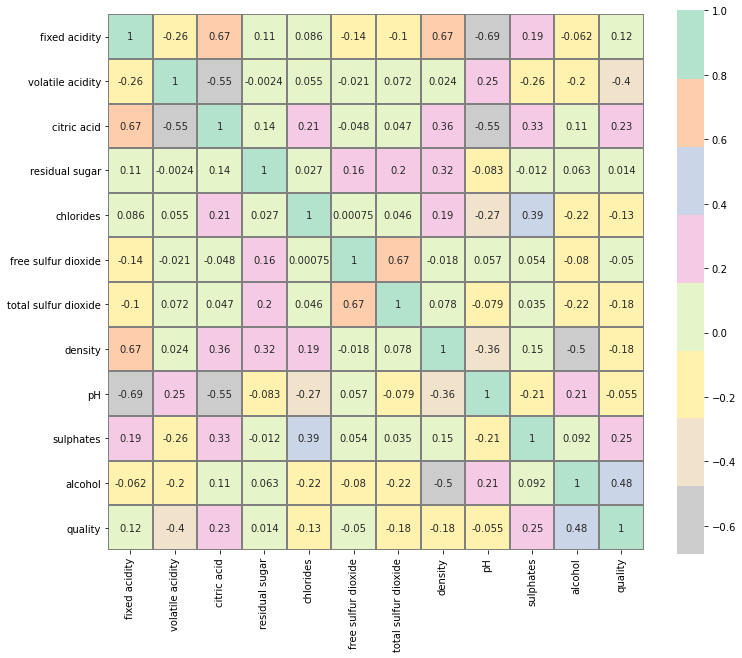

In [17]:
#correlation heatmap
plt.figure(figsize=[12,10])
sns.heatmap(data= df.corr(),  annot= True , fmt='.2g',cmap="Pastel2_r" , linewidths=1,linecolor='grey' , square=True)

<AxesSubplot:>

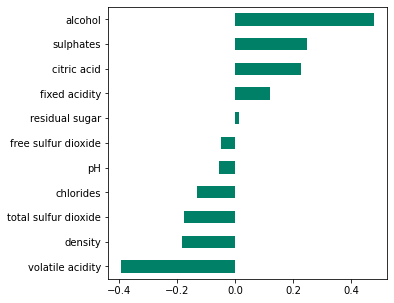

In [18]:
df.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (5,5), colormap = 'summer')

***


<b>OBSERVATION:</b> 

1. From the Heatmap, we infer that ,
    * the target variable`quality` is positively correlated with `alcohol`(0.48), `sulphates`(0.27) and `citric acid`(0.24) and is *strongly negatively correlated* with `volatile acidity`(-0.39) ,`total suphur dioxide` & `density`(0.18).
    * With the remaining features, *Quality* shows a weak correlation.
    * Also , other independent features are dependent on each other like, **multicollinearity exists**, i.e., `fixed acidity` has a strong correlation with `citric acid` and `density`(0.67). `Ph` is strongly negatively correlated with `fixed acididty`(-0.68) and `citric acid`(0.55) . `Free sulphur dioxide` positively strongly correlated with `total sulphur di oxide`(0.66).

2. From the Barplot, 
    * we can clearly see the features with neagtive and positive correlation . Horizontal Bar plot is obtained using pandas. 
    * We can see that `alcohol` has the highest positive corrrelation level while `volatile acidity` highest negative correlation.


***

### 4. Check for distribution of the target variable 'Quality' : 
<a name="imb"></a>

C:\Users\Hp\Anacondaaa\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

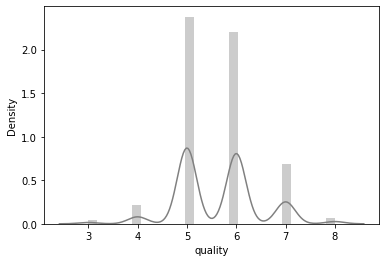

In [19]:
#checking  the frequency of the target variable- Quality
sns.distplot(df['quality'], color= "gray")


<AxesSubplot:xlabel='quality', ylabel='count'>

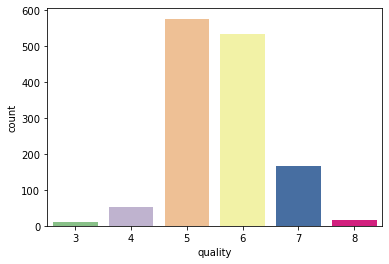

In [20]:
# To check for class imabalance distribution in target variable'Quality'
sns.countplot(x ='quality' , data = df, palette = "Accent")


In [21]:
df['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

***
<b>OBSERVATION:</b>

1. We have used a `distplot`, to depict the variations in the target variable. 
    * We observe that the dirstibution is more concentrated between 4 and 7 with higher frequency in 5 ,6.
    * It is imablanced.
2. Next, to view the class imbalance, `countplot` is used.
    * It depicts that 5 and 6 values have more count when compared to 3,4,7 and 8.
    * Also, the unique `value_counts()` are got in `cell 21`, to get the exact values. 
    * We can say,maximum value is present in `quality==5` which is 571 and the least in `quality==3` which has 10 values. 

### 5. Histogram Plots:

<a name="hist"></a>

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='F

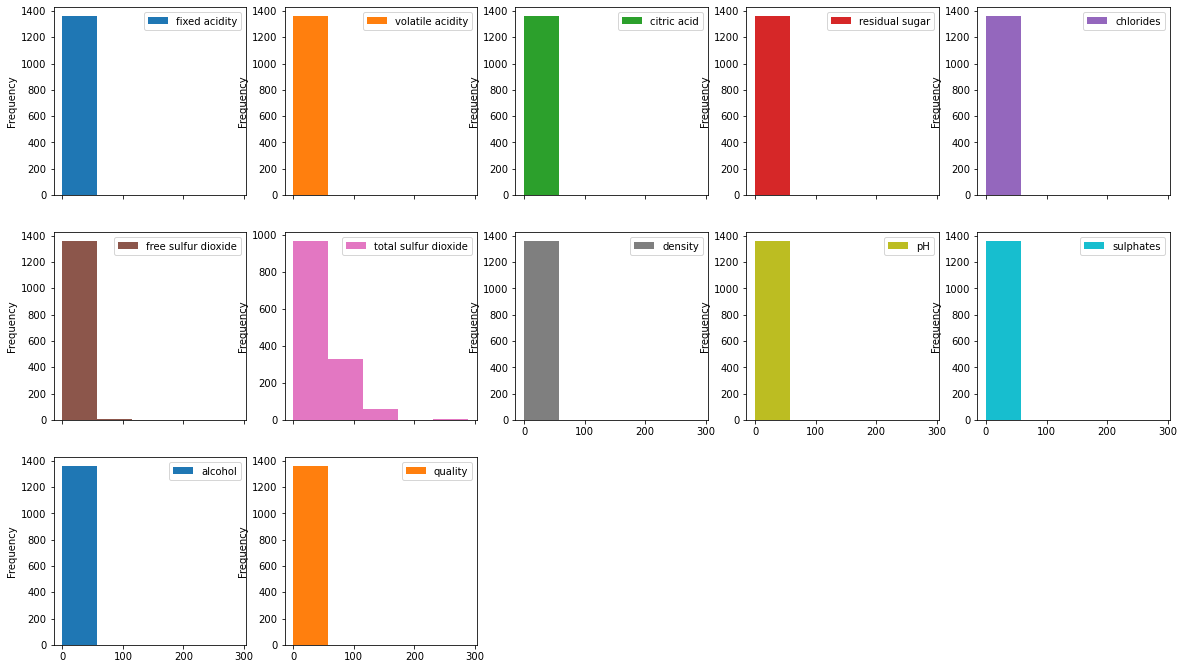

In [22]:
#histogram plotting using pandas
df.plot.hist(subplots=True, layout=(5 , 5), figsize=(20, 20), bins=5)

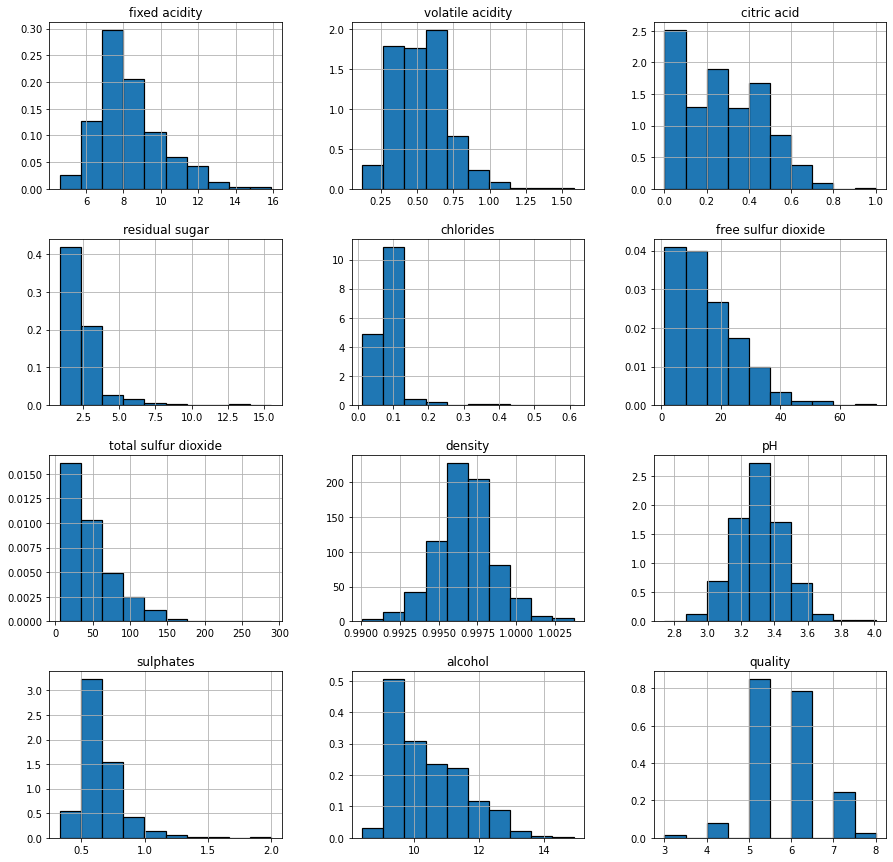

In [23]:
#histogram plotting using pandas

df.hist(edgecolor='black', linewidth=1.2 , density = True)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()


***

<b>OBSERVATION:</b>

From the above histogram, 
* We can infer that, most of the features are not evenly distributed. 
* Most features exhibits highest right skewness, from `cell 23`
* `Density` shows a normal distribution.

<u>**NOTE**</u> Transforming the features would be mandatory to bring them in range prior prediction because of uneven distribution.



***

<hr style="border:01px  solid gray"> </hr>

## <center> MULTIPLE LINEAR REGRESSION ASSUMPTIONS<a name="mlpa"></a>

<hr style="border:01px  solid gray"> </hr>

In this section, we will be checking for the Multiple Linear Regression Assumptions. Since, we will be implementing Multiple Linear Regression, we will check if the assumptions are met. 


1. [All variables are continuous numeric and free from outliers](#1LR)
2. [Linear realtionship between the predictors and predictant](#ScatterPlot)
3. [Multivariate Normality–residuals are normally distributed](#boxcox)
4. [All predictors are independent of each other(NO multicollinearity)](#VIF)
5. [Homoscadecity](#homosceda)

In [24]:
BX = df.copy()

### 1.All variables are continuous numeric and free from outliers.<a name="1LR"></a>

In [25]:
#1. All variables are continuous numeric. 

BX.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [26]:
#Data is free from outliers and missing values.

print(f"Found {len(outlier_list)} outliers in the entire dataset.")

Found 0 outliers in the entire dataset.


### 2.Linear realtionship between the predictors and predictant<a name="ScatterPlot"></a>

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

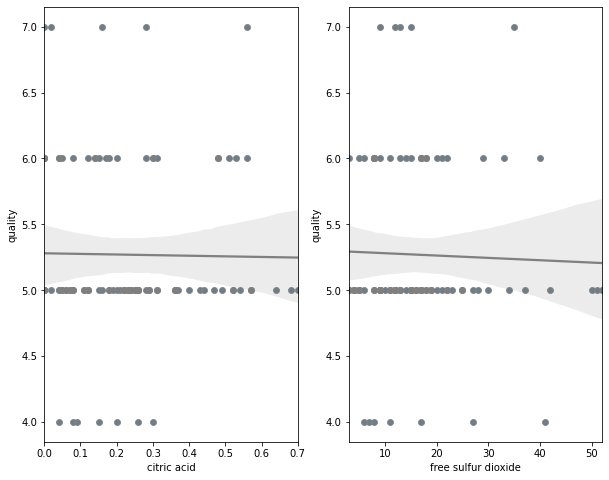

In [27]:
#2. Linear relationship between the predictors and predictant

## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (10,8), ncols=2,sharey=False)
## Scatter plotting for Citric acid vs quality. 
sns.scatterplot( x = BX['citric acid'][0:100], y = BX['quality'][0:100],  ax=ax1)
## Putting a regression line. 
sns.regplot(x = BX['citric acid'][0:100], y = BX['quality'][0:100] ,ax=ax1 , color='gray')

## Scatter plotting for  free sulfur dioxide vs quality 
sns.scatterplot(x = df['free sulfur dioxide'][0:100], y = df['quality'][0:100], ax=ax2)
## regression line for free sulfur dioxide vs quality 
sns.regplot(x=df['free sulfur dioxide'][0:100], y = df['quality'][0:100], ax=ax2 , color='gray')

### 3. Multivariate Normality–residuals are normally distributed <a name="boxcox"></a>

Before transformation


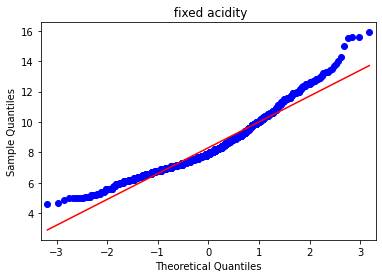

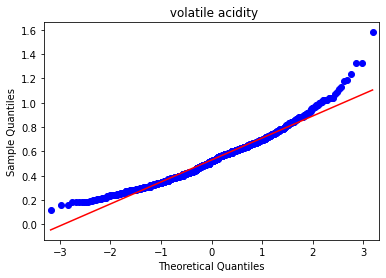

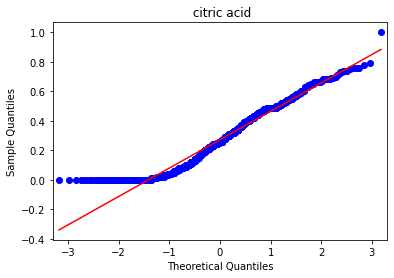

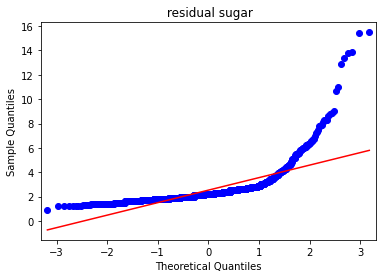

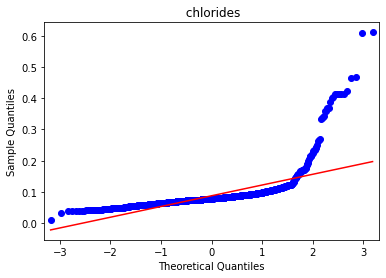

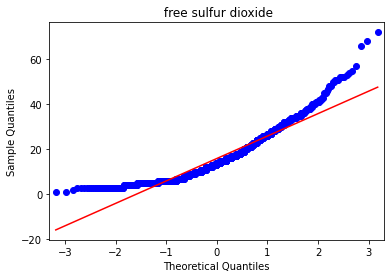

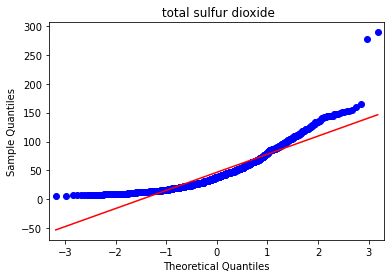

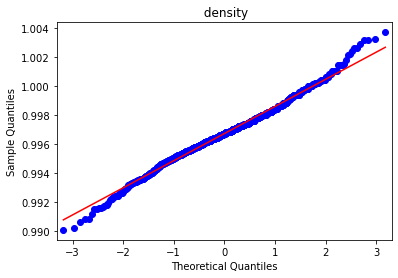

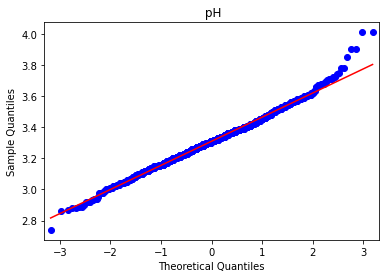

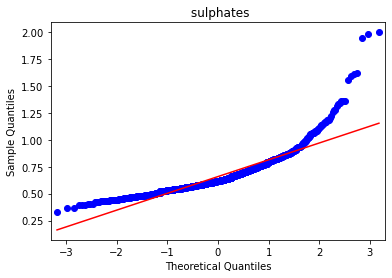

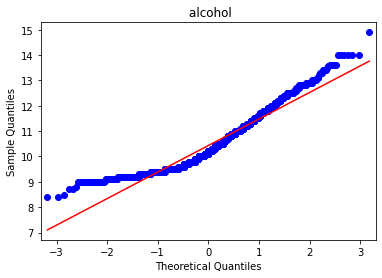

In [28]:
#Residuals should have normal distribution.

print("Before transformation")

for featu in ['fixed acidity','volatile acidity', 'citric acid' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']:
    smq.qqplot(df[featu], line ='r')
    plt.title(' {}'.format(featu))
    plt.show()


In [29]:
#to check for skew values first
numeric_feats = BX.dtypes[BX.dtypes != "object"].index

skewed_feats = BX[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

print("BEFORE SKEWING:\n\n\n",skewed_feats)

BEFORE SKEWING:


 chlorides               5.496412
residual sugar          4.543132
sulphates               2.403848
total sulfur dioxide    1.538667
free sulfur dioxide     1.225225
fixed acidity           0.940002
alcohol                 0.858892
volatile acidity        0.728474
citric acid             0.312380
pH                      0.231776
quality                 0.192194
density                 0.044728
dtype: float64


In [30]:
def fixing_skewness(bct):
    
  
    ## Getting all the data that are not of "object" type. 
    numeric_feats = bct.dtypes[bct.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_feats = bct[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.2]
    skewed_features = high_skew.index
    print ("There are {} higest skewed numerical features to perform box cox transformation".format(skewed_features.shape[0]))
    print ("\n\nThey are: " , skewed_features[0:10])
    
 #compute skewness
    skewness = pd.DataFrame({'Skew' :skewed_features})   

    for feat in skewed_features:
        bct[feat] = boxcox1p(bct[feat], boxcox_normmax(bct[feat] + 1))   
        
fixing_skewness(BX)

There are 10 higest skewed numerical features to perform box cox transformation


They are:  Index(['chlorides', 'residual sugar', 'sulphates', 'total sulfur dioxide',
       'free sulfur dioxide', 'fixed acidity', 'alcohol', 'volatile acidity',
       'citric acid', 'pH'],
      dtype='object')


In [31]:
#to check for skew values first
numeric_feats = BX.dtypes[BX.dtypes != "object"].index

skewed_feats = BX[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)

print("AFTER SKEWING:\n\n\n",skewed_feats)

AFTER SKEWING:


 quality                 0.192194
citric acid             0.141706
alcohol                 0.080274
density                 0.044728
free sulfur dioxide     0.023701
volatile acidity        0.008366
fixed acidity           0.003343
total sulfur dioxide    0.002874
sulphates               0.002441
pH                     -0.015223
residual sugar         -0.044557
chlorides              -0.188668
dtype: float64


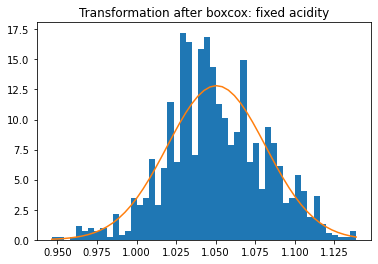

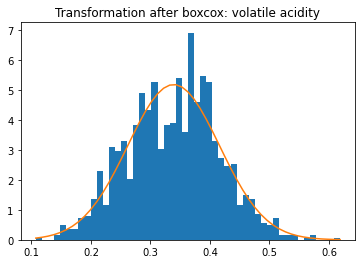

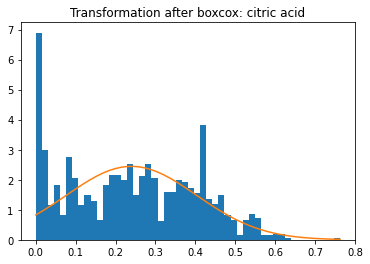

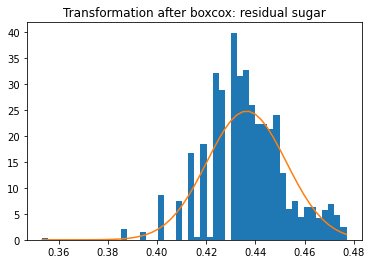

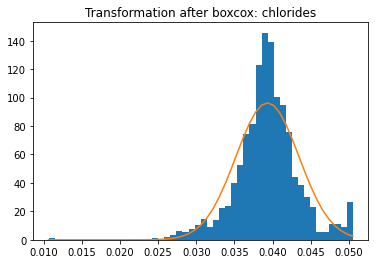

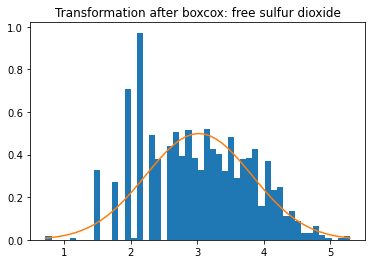

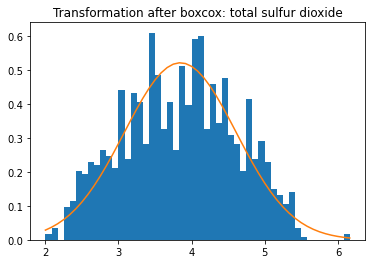

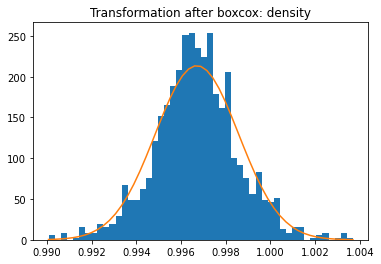

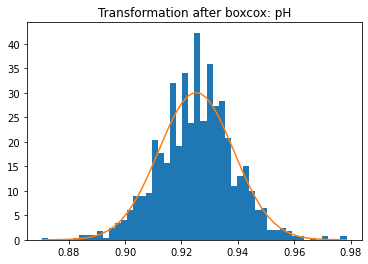

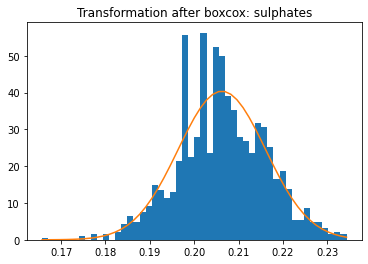

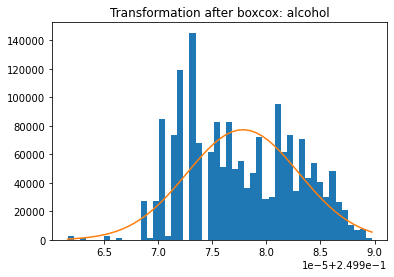

In [32]:
import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline


for feature in ['fixed acidity','volatile acidity', 'citric acid' ,'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','sulphates','alcohol']:
    
    n, bins, patches = plt.hist(BX[feature],50, density=True )
    mu = np.mean(BX[feature])
    sigma = np.std(BX[feature])
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation after boxcox: {}".format(feature))
    plt.show()

In [33]:
print("\tBefore skew:\n" , "*"*30 )
print(df.skew())
print()
print()
print("\tAfter skew:\n" , "*"*40)
print(BX.skew())


	Before skew:
 ******************************
fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64


	After skew:
 ****************************************
fixed acidity           0.003347
volatile acidity        0.008375
citric acid             0.141863
residual sugar         -0.044606
chlorides              -0.188877
free sulfur dioxide     0.023727
total sulfur dioxide    0.002877
density                 0.044778
pH                     -0.015240
sulphates               0.002443
alcohol                 0.080363
quality                 0.192407
dtype: float64


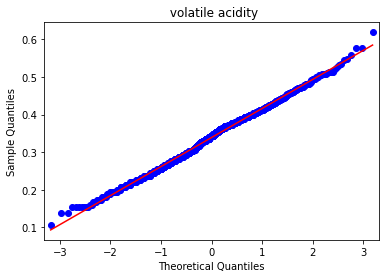

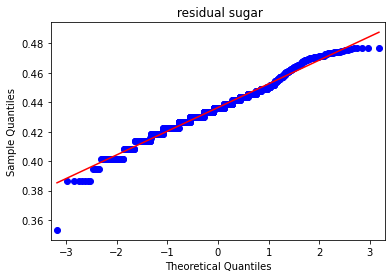

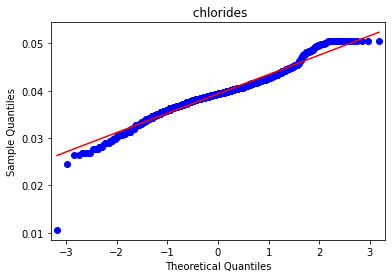

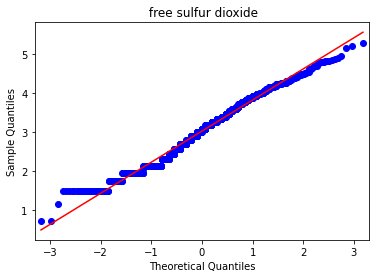

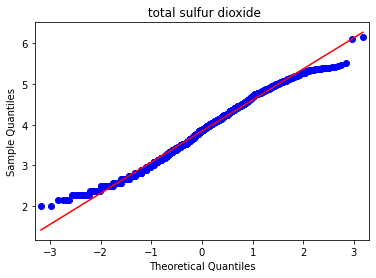

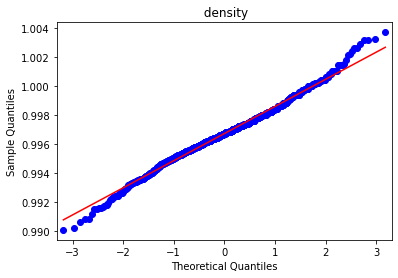

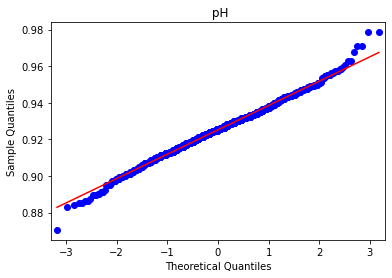

KeyError: 'citric acidsulphates'

In [34]:
for FB in ['volatile acidity','residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density','pH','citric acid''sulphates','alcohol']:
    smq.qqplot(BX[FB], line ='r')
    plt.title(' {}'.format(FB))
    plt.show()

### 4.All predictors are independent of each other(No multicollinearity)<a name="VIF"></a>

In [35]:
# All predictors are independent of each other(multicollineariy)(VIF)
def VRF(predict, data, y):
   
    scale = StandardScaler(with_std=False)
    df_ = pd.DataFrame(scale.fit_transform(data), columns= cols)
    features = "+".join(cols)
    df_['quality'] = y.values

# get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df_, return_type='dataframe')

# Calculate VIF Factors
# For each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns

# Inspect VIF Factors
    display(vif.sort_values('VIF Factor'))
    return vif

cols = BX.columns.str.replace(' ', '_')
df_ = BX.copy()
df_.columns = cols

vif = VRF('quality', df_.loc[:, cols], BX['quality'])


,VIF Factor,features
5,1.408781,chlorides
10,1.461143,sulphates
12,1.594906,quality
4,1.735716,residual_sugar
2,1.968207,volatile_acidity
6,2.881731,free_sulfur_dioxide
3,2.914070,citric_acid
11,2.932682,alcohol
9,3.162937,pH
7,3.266734,total_sulfur_dioxide


In [36]:
BX = BX.drop(BX[['fixed acidity', 'density']], axis = True)
print(BX.columns)

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')


### 5.Homoscadecity<a name="homosceda"></a>

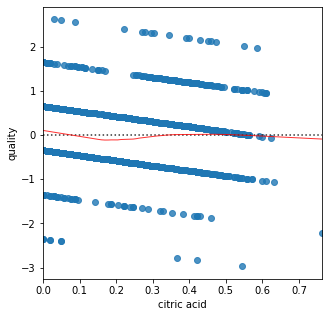

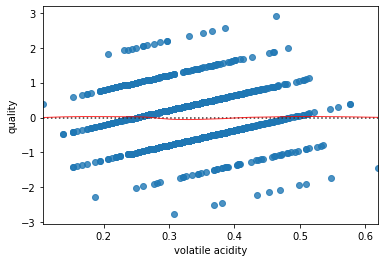

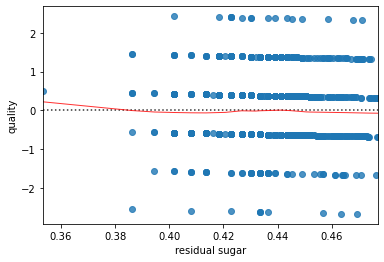

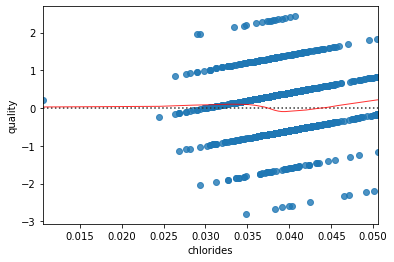

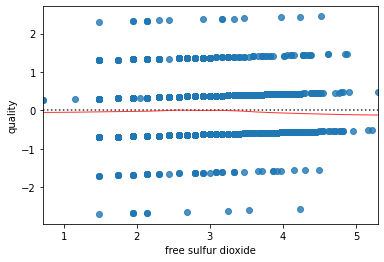

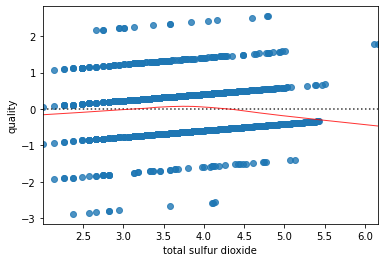

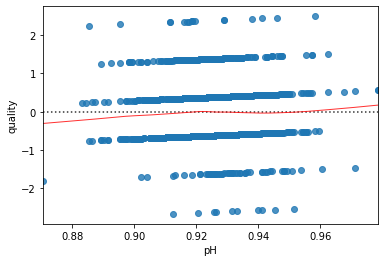

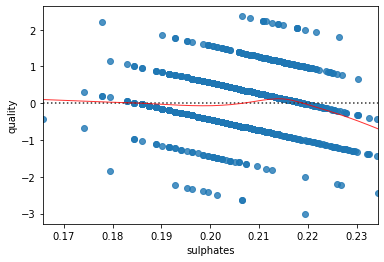

In [37]:
#6. Homoscedacity check using resid plot

plt.subplots(figsize = (5,5))

# draw residplot
sns.residplot(x = "citric acid",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "volatile acidity",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "residual sugar",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "chlorides",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "free sulfur dioxide",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "total sulfur dioxide",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "pH",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()
sns.residplot(x = "sulphates",y = "quality",data = BX,lowess = True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.show()



<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

<b>1. All variables are continuous numeric and free from outliers:</b>
   * We infer from `cell 26 `, that there are no outliers present.
   * Also we see that the dtype is float indicating all are numeric values in the dataset. 
    
<b>2. Linear realtionship between the predictors and predictant:</b>
   * From `cell 27 ` , we see that a linear relationship exists between the independent features and the dependent target variable. 
   * We have used a scatterplot to check for linearity.
   * The regression line model fit plot, regplot is done based on first 100 records. 
    
<b>3. Multivariate Normality–residuals are normally distributed:</b>
   * From `cell 28 `, with a qqplot, it is infered that, the residuals aren't normally distributed. There are points that fall far away from the red line. Indicating,model suffering suffers from **heavy tails**.
   * Hence , to overcome this issue , we use **BOXCOX TRANSFORMATION** on our features. We infer that 10 features are highly skewed. 
   * After BOXCOX, `cell 32` shows a distribution of the values, after BOXCOX and we can say are features are normally distributed now and can proceed further.
   * `cell 33` shows the skewness values before and after boxcox. We see the values are skewed perfectly.
   * We see from `cell 34`, in the normal QQplot,they fit the line perfectly. 
        
<b>4. All predictors are independent of each other( NO multicollinearity):</b>
   * The Heatmap , clearly stated many features are correlated with each other. We saw, multicollineraoty exists. 
   * Hence to overcome this issue, we used **VIF(Variance Inflation Factor)**. 
   * In `cell 35` , VIF values are pritnted for each feature.
   * Values with VIF > 5, are deleted, as probability of collinearity may exist. 
   * We removed two features, `Fixed_acidity` and `density` having VIF of 6.17 & 5.53 respectively in `cell 36`.
    
<b>5. Homoscadecity:</b>
   * In `cell 37` , we have used **residual plots** to check for homoscedacity in our dataset. 
   * We can infer from the residual model that, the red line is horizontal and fits perfectly. Indicating that residuals has a constant variance.
    
    
    
<hr style="border:.03px  solid black"> </hr>

<hr style="border:01px  solid gray"> </hr>

## <center>DATA MODELLING<a name="dm"></a>

<hr style="border:01px  solid gray"> </hr>


1. [Train_test_split](#tts)
2. [Standardizing the feature](#scal)
3. [Cross Validation](#cv)
4. [Implementing the Linear Models](#lm)
    

###  1. Train_Test_Split: <a name="tts"></a>


In [38]:
wine_data_frame = BX.copy()
wine_data_frame.head(5)


,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.414402,0.000000,0.426726,0.038680,2.802483,3.744133,0.942186,0.200495,0.249972,5
1,0.471590,0.000000,0.445514,0.042596,3.818207,4.487149,0.916012,0.210211,0.249975,5
2,0.434747,0.039432,0.438955,0.041685,3.171724,4.248233,0.921328,0.208121,0.249975,5
3,0.219434,0.472815,0.426726,0.038460,3.325832,4.364640,0.912398,0.202389,0.249975,6
4,0.400033,0.000000,0.422794,0.038460,2.999081,3.919853,0.942186,0.200495,0.249972,5


In [39]:
#splitting features and traget variable

feats = wine_data_frame.drop('quality' , axis = 'columns')
targs = wine_data_frame['quality']
feats

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,0.414402,0.000000,0.426726,0.038680,2.802483,3.744133,0.942186,0.200495,0.249972
1,0.471590,0.000000,0.445514,0.042596,3.818207,4.487149,0.916012,0.210211,0.249975
2,0.434747,0.039432,0.438955,0.041685,3.171724,4.248233,0.921328,0.208121,0.249975
3,0.219434,0.472815,0.426726,0.038460,3.325832,4.364640,0.912398,0.202389,0.249975
4,0.400033,0.000000,0.422794,0.038460,2.999081,3.919853,0.942186,0.200495,0.249972
...,...,...,...,...,...,...,...,...,...
1354,0.384963,0.077776,0.426726,0.036792,3.967763,3.864226,0.934906,0.217793,0.249973
1355,0.377150,0.077776,0.430261,0.041358,4.146742,4.023612,0.937360,0.202389,0.249979
1356,0.356746,0.096561,0.436335,0.035170,4.417309,4.185318,0.942980,0.214926,0.249982
1357,0.394466,0.115101,0.430261,0.038460,4.146742,4.023612,0.946905,0.212115,0.249978


In [40]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(feats, targs , test_size = 0.3, stratify= targs)

In [41]:
#check for the ratio split
for dataset in [X_train, X_test]:
    print(round(len(dataset) / len(targs), 2))

0.7
0.3


In [42]:
#print the total samples in train,val and test set
print('There are {} samples in the training set. \n \nThere are {} samples in the test set'.format(X_train.shape[0],X_test.shape[0]))
print()



There are 951 samples in the training set. 
 
There are 408 samples in the test set



In [43]:
X_train.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
1307,0.281730,0.288428,0.422794,0.036005,4.228976,4.364640,0.938172,0.215938,0.249976
748,0.419620,0.009964,0.433449,0.035732,4.103919,3.998538,0.934081,0.201458,0.249984
948,0.286914,0.428766,0.463745,0.029784,4.014510,4.685242,0.940589,0.208840,0.249988
850,0.410873,0.000000,0.416011,0.033021,2.298896,2.662260,0.938981,0.197405,0.249987
1151,0.392589,0.160418,0.468518,0.048206,4.822118,4.913705,0.923071,0.193981,0.249973


In [44]:
#getting the values in target variable 
from collections import Counter
print(sorted(Counter(targs).items()))

[(3, 10), (4, 53), (5, 577), (6, 535), (7, 167), (8, 17)]


### 2. Standardizing the features: <a name="scal"></a>

In [45]:
#fitting StandardSCaler on trainset
scaler = StandardScaler()
sc = scaler.fit(X_train)

In [46]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [47]:
print( "BEFORE SCALING X_train:\n\n", X_train[ 0 : 5 ]) 
print("\n\n\n\n\nAFTER SCALING X_train:\n\n", X_train_scaled[1:5])

BEFORE SCALING X_train:

       volatile acidity  citric acid  residual sugar  chlorides  \
1307          0.281730     0.288428        0.422794   0.036005   
748           0.419620     0.009964        0.433449   0.035732   
948           0.286914     0.428766        0.463745   0.029784   
850           0.410873     0.000000        0.416011   0.033021   
1151          0.392589     0.160418        0.468518   0.048206   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates   alcohol  
1307             4.228976              4.364640  0.938172   0.215938  0.249976  
748              4.103919              3.998538  0.934081   0.201458  0.249984  
948              4.014510              4.685242  0.940589   0.208840  0.249988  
850              2.298896              2.662260  0.938981   0.197405  0.249987  
1151             4.822118              4.913705  0.923071   0.193981  0.249973  





AFTER SCALING X_train:

 [[ 1.08251448 -1.43484327 -0.20607885 -0.89442583  1.35575538

### 3. Cross Validation: <a name="cv"></a>

In [48]:
#linear regression implementation
linreg_cv = LinearRegression()
scores_k_lr = cross_val_score(linreg_cv, X_train_scaled, y_train, cv=5)

print("Average cross validation score for Linear Regression is: ",scores_k_lr.mean())
print()
print("Cross validation scores:",scores_k_lr)


Average cross validation score for Linear Regression is:  0.3488970774999708

Cross validation scores: [0.35942236 0.31774609 0.25159385 0.42312672 0.39259637]


In [49]:
#stochastic gradient descent implementation
sgd_cv = SGDRegressor()

scores_k_sgd = cross_val_score(sgd_cv, X_train_scaled, y_train, cv=5)


print("Average cross validation score for Gradein dec is:",scores_k_sgd.mean())
print()
print("Cross validation scores:",scores_k_sgd)

Average cross validation score for Gradein dec is: 0.3499903101652496

Cross validation scores: [0.36526464 0.31845854 0.252564   0.42294391 0.39072046]


### 4. Implementing the Linear Models for prediction: <a name="lm"></a>


In this section, we will be implementing **linear_model** for prediction. 
* We will be using Multiple Linear Regression and Stochastic Gradient Descent .
* Also, a regularization model, Ridge Regression is used for predicting. 

In [50]:
from sklearn import metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2_square)
   
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square



In [51]:
from sklearn.linear_model import LinearRegression

lin_regg = LinearRegression()
lin_regg.fit(X_train_scaled,y_train)
LR_pred = lin_regg.predict(X_test_scaled)

train_pred = lin_regg.predict(X_train_scaled)
print('Train set evaluation:')
print('*'*30)
print_evaluate(y_train, train_pred)

Train set evaluation:
******************************
MAE: 0.503481958098657
MSE: 0.42952251014753984
RMSE: 0.6553796687016922
R2: 0.36693210786559494


In [52]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(n_iter_no_change=30, penalty ='None',  max_iter=100000, loss = "squared_loss")
sgd_reg.fit(X_train_scaled, y_train)
SGD_pred = sgd_reg.predict(X_test_scaled)

train_pred = sgd_reg.predict(X_train_scaled)
print('Train set evaluation:')
print('*'*30)
print_evaluate(y_train, train_pred)








Train set evaluation:
******************************
MAE: 0.503525250647773
MSE: 0.430018741644083
RMSE: 0.6557581426441329
R2: 0.3662007184270778


In [53]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge( alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,)
ridge_reg.fit(X_train_scaled, y_train)
ridge_pred = ridge_reg.predict(X_test_scaled)

train_pred = ridge_reg.predict(X_train_scaled)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 0.5034871581857836
MSE: 0.4295228012862621
RMSE: 0.655379890816206
R2: 0.36693167875984867


In [54]:
ridge_reg.score(X_test_scaled, y_test)

0.3708412822852918

<hr style="border:.03px  solid black"> </hr>

**OBSERVATION:**


1. The dataset is split into 70 :30 ratio in `cell 40`. We check for the split ratio values in `cell 41`.
    * Train set has 951 samples which is 70% of the total (1359 samples) and test set has 408 samples, `cell 42`
    * Also, we see that our target variable shows imbalance in the values. 
    * Therefore we use **stratify = y** to have unform distributions.


2. Data scaling is done to bring the values in range.
 	* `cell 47` shows the values before and after scaling. 


3. Before actual implementation, **crossvalidaion** of n=5 is done using Mutiple Linear regression & Stochastic Gradient Descent.
    * An average score of 34.88% and 34.99% is returned respectively( Cell 48 & 49)


4. Finally, we implement the linear models.
    * Firstly, a definition function *print_evaluate* is defined to print the scores of Train Set. 
    * Another function *evaluate* is run to get the predicted scores from the test set. 
    * **Multiple Linear Regression** and **Stochastic Gradient Descent** gave a R2 value of 0.36 and RMSE of 0.65 on the train set.
    *<b>We can see that our R2 scores on training set is less. Hence to recheck the metric scores, we have used regularization technique, the Ridge regression.
    *The parameters passed are :
    Ridge( alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,)
    * As Ridge, L2 regularization tries to estimate the mean of the data in order to avoid overfitting if present. We see that on the test Set , R2 is improved by only 1% , providing 37%.</b>


NOTE: Stochastic Gradient Descent algorithm is used over Gradient Descent , as our dataset is massive with more records and features.Also,with SGD, computation is faster .

<hr style="border:.03px  solid black"> </hr>
 

<hr style="border:01px  solid gray"> </hr>

## <center>MODEL EVALUATION <a name="me"></a>

<hr style="border:01px  solid gray"> </hr>



1. [Evaluating Model performance](#emp)
2. [Feature Importance](#fi)
3. [Visualizing features based on Feature Importance](#vfi)



### 1. Evaluating Model performance <a name="emp"></a>

In [55]:
test_pred = lin_regg.predict(X_test_scaled)
results_df = pd.DataFrame(data = [["Linear  Reggresion", *evaluate(y_test, test_pred)]],
                           columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
results_df


test_pred = sgd_reg.predict(X_test_scaled)
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df


test_pred = ridge_reg.predict(X_test_scaled)
results_df_2 = pd.DataFrame(data=[["Ridge", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2
0,Linear Reggresion,0.500055,0.425438,0.652256,0.370802
1,Stochastic Gradient Descent,0.499876,0.425921,0.652626,0.370086
2,Ridge,0.500025,0.425411,0.652235,0.370841


In [56]:
from sklearn import metrics as sm
print("\tLINEAR REGRESSION SCORES:\n")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, LR_pred), 4))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, LR_pred), 4))
print('Root Mean Squared Error:', round(np.sqrt(sm.mean_squared_error(y_test, LR_pred)),4))
print("R2 score or coefficient of determination=", round(sm.r2_score(y_test, LR_pred), 4))


	LINEAR REGRESSION SCORES:

Mean absolute error(MAE) = 0.5001
Mean squared error(MSE) = 0.4254
Root Mean Squared Error: 0.6523
R2 score or coefficient of determination= 0.3708


In [57]:
print("\tSTOCHASTIC GRADIENT SCORES:\n")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, SGD_pred), 4))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, SGD_pred), 4))
print('Root Mean Squared Error:', round(np.sqrt(sm.mean_squared_error(y_test, SGD_pred)),4))
print("R2 score or coefficient of determination =", round(sm.r2_score(y_test, SGD_pred), 4))


	STOCHASTIC GRADIENT SCORES:

Mean absolute error(MAE) = 0.4999
Mean squared error(MSE) = 0.4259
Root Mean Squared Error: 0.6526
R2 score or coefficient of determination = 0.3701


In [58]:
print("\t RIDGE SCORES:\n")
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, ridge_pred), 4))
print("Mean squared error(MSE) =", round(sm.mean_squared_error(y_test, ridge_pred), 4))
print('Root Mean Squared Error:', round(np.sqrt(sm.mean_squared_error(y_test, ridge_pred)),4))
print("R2 score or coefficient of determination =", round(sm.r2_score(y_test, ridge_pred),4))



	 RIDGE SCORES:

Mean absolute error(MAE) = 0.5
Mean squared error(MSE) = 0.4254
Root Mean Squared Error: 0.6522
R2 score or coefficient of determination = 0.3708


<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

*  `Cell 55` , shows the evalutaion metrics based on the predicted scores from TestSet. 
* In the evaluation metrics , we will be ignoring MEAN ABSOLUTE ERROR(MAE) rate, as we have removed our outliers and MAE is robust to outliers. Also, Mean Squared Error (MSE) doesn't have the same unit as the target variable since it's value will be squared. Hence, we will be focusing on Root Mean Squared Error (RMSE) and Coefficient of the determination(R2).  We see that,
	* **Linear regression** :R2 = 37.08% and RMSE = 0.65 
	* **Stochastic Gradient Descent** : R2 = 37% and RMSE = 0.65
	* **Ridge Regression** : R2 = 37.08% and RMSE = 0.65
We can say that, Multiple Linear Regression has given a Co-efficient of determination of 37%. On the other hand, Stochastic Gradient has a similar R2 value. 
Similarly, after regularization, the max score possible was 37%. 


* **With the R2 value evaluated, we can say that ,our model's data points are not perfectly linear, as a less variance in the dependent variable indicating R2 to be close to 0.** 



<hr style="border:.03px  solid black"> </hr

### 2.Feature Importance <a name="fi"></a>

In [59]:
feat_impo = BX.copy()

In [60]:
fcol = feat_impo.drop('quality' , axis =1)
flab =feat_impo['quality']

Feature: 0, Score: -3.11787
Feature: 1, Score: 0.33763
Feature: 2, Score: 0.72083
Feature: 3, Score: -0.66121
Feature: 4, Score: 0.18223
Feature: 5, Score: -0.30493
Feature: 6, Score: 0.38551
Feature: 7, Score: 2.28744
Feature: 8, Score: 0.00195


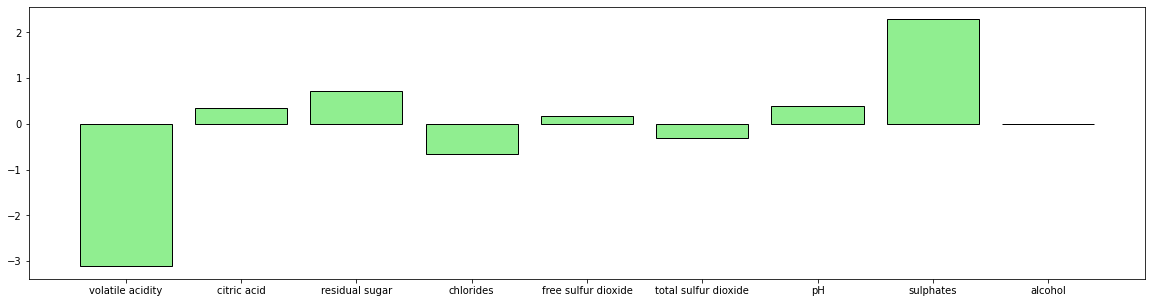

In [61]:
#Feature_importance score suing Ridge() model
model = Ridge(alpha=1.0)
# fit the model
model.fit(fcol, flab)
# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

fig=plt.gcf()
fig.set_size_inches(20,5)

    
#plot feature importance
pyplot.bar( range(len(importance)), importance , color = "lightgreen", edgecolor =  "black" )
plt.xticks(range(len(importance)), fcol.columns)
pyplot.show()


<AxesSubplot:>

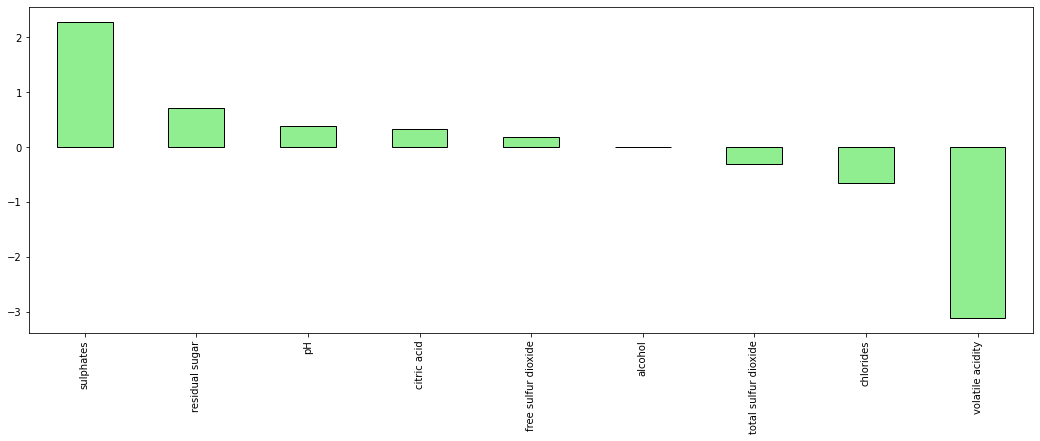

In [62]:
#sorting the scores 
tr = pd.Series(importance)
tr.index = fcol.columns
tr.sort_values(inplace=True, ascending=False)
tr.plot.bar(figsize=(18,6), color = "lightgreen", edgecolor =  "black")


<hr style="border:.03px  solid black"> </hr

**OBSERVATION:**

* We have used , `RidgeRegression()` , to get the feature importance of the model.
*  A barplot is used for visualization, where we can depict that , `Volatile acidity` has the highest **feature_importance of -3.11** followed by `Sulphates` , having a **feature_importance score of 2.28**. `Alcohol` has the **least feature_importance score of 0.0019**.
* In `cell 62`, we have sorted the feature_importance scores , so as to have a clear view of the barplot . We can say that,the order of top 5 feature_importance score are :`Volatile acidity`, `Chlorides` , `Sulphates`, `Residual sugar` and
`pH`. Where, `Volatile Acidity` and `Chlorides` posses a  strong negative score impoprtance. On the other hand, `Sulphates`, `Residual sugar` and `pH` have strong positive feature_impootance scores. 

<hr style="border:.03px  solid black"> </hr


### 3. Visulization based on Feature Importance Score <a name="vfi"></a>

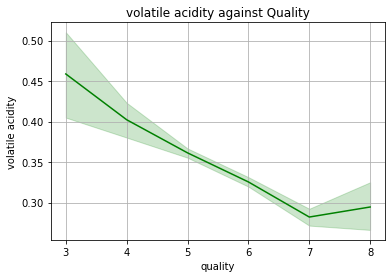

In [63]:
sns.lineplot(x="quality", y="volatile acidity", data=BX , color= "green")
plt.title("volatile acidity against Quality")
plt.grid()

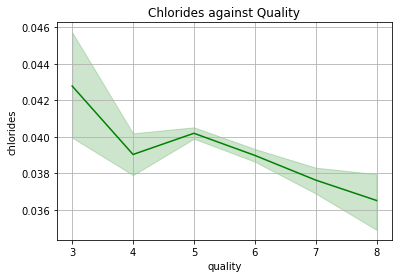

In [64]:
sns.lineplot(x="quality", y="chlorides", data=BX , color= "green" )
plt.title("Chlorides against Quality")
plt.grid()

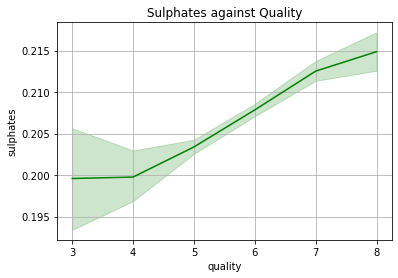

In [65]:
sns.lineplot(x="quality", y="sulphates", data=BX , color= "green" )
plt.title("Sulphates against Quality")
plt.grid()

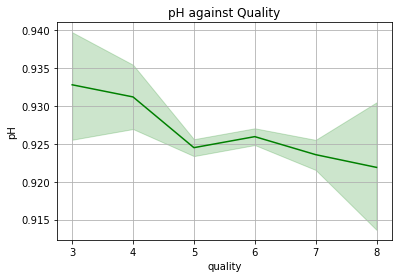

In [66]:
sns.lineplot(x="quality", y="pH", data=BX, color= "green" )
plt.title("pH against Quality")
plt.grid()

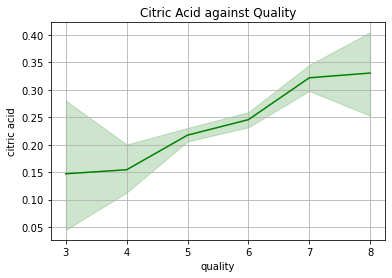

In [67]:
sns.lineplot(x="quality", y="citric acid", data=BX, color= "green" )
plt.title("Citric Acid against Quality")
plt.grid()


<hr style="border:.03px  solid black"> </hr>

**OBSERVATION**

From th above `feature_importance` scores, we tried visulaizing the correlation using a lineplot and we see how the top 5 highest scores show their relation with the target variable.


1. <u>Quality vs Volatile Acidity</u> : With decrease in `Volatile Acidity`, `quality` increases. The lesser the `volatile acidity`, maximum the score is .,i.e 8. Indicating a strong negative correlation, where the score found was **feature_importance = -3.11**
2.<u>Quality vs Chlorides:</u> As `Chlorides` decreases, `Quality` improves. Thus proving a negative relationship with the **feature importance_Score = -0.66** .
3.<u>Quality vs Sulfates :</u></u></u>With increase in sulfate , the quality increases.Hence a strong positive correlation is exhibited. The **Feature_importance score = 2.28**
4.<u>Quality vs pH : </u></u> As the `pH` decreases gradually, the `quality` increases. A small correlation between `pH` and `quality` is observed with a **feature_importance score = 0.38** 
5.<u>Quality vs Citric Acid:</u> With more `citric acid`, wine `quality` increases. Indicating a small positive relationship with **Feature_importance score =0.33**.


<hr style="border:.03px  solid black"> </hr>



<hr style="border:01px  solid gray"> </hr>

## <center>CONCLUSION<a name="cln"></a>

<hr style="border:01px  solid gray"> </hr>

>From the above implementation and evalutaion, we can say for this particular model of Predicitng the Wine Quality with Linear models, the maximum score achievable is 37%. This is not desirable as the RMSE obtained is more accounting to 65% . The lesser the RMSE, the powerfull the model . If we had more data, a better fir model could be made. ALso, ensemble regression models could be used for prediction, which might show and have a better metric score.The reason for low R2 , possibly could be because , our target variable is not balanced. Hence an ideal or alternate solution would be to group them or classify them and  use Classification ALgorithms. 

<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>
<hr style="border:.03px  solid black"> </hr> <a name="ob"></a>

# <center>OVERALL OBSERVATION</b></center>

**1. With respect to data pre-processing:**

* Though the target variable, suffers from class imbalance, sampling wasn't used as it isn't a classification problem and the traget variable values were considered as it is. Eventhough,on trying SMOTE for balancing the data , we got an R2 of 70% with RMSE 60% indicating a poor model. As it is unacceptable to have high error rate along with High R2. 
* Hence,sampling wasn't performed. <br>

**2. With respect to dimensionality reduction:**
* PCA was implemented on the wine dataset. But the R2 was less with less features. With 
        PCA =2 , R2 = 21%,
        PCA = 5, R2 = 29%
        PCA = 7, R2 = 31%
        PCA = 10, R2 = 33%.
* Hence, we observed that all the features are highly correlated and is needed for prediction. Therefore, we conisdered all the features here and did not use PCA. 

**3. With respect to Multiple Linear Regression Assumptions:**
* We removed the rows,with values greater than VIF = 5, as it states there might be a probability of multicollinearity. Without the removal of features having a  **VIF >= 5, our R2 was 34%**. This indicates ,a multicollinearity existed.
* Hence we removed the two features with VIF value more than 5. 
        
**4. WIth respect to Train_Test_Split ratio:**
* Train_Test_Split ratio of 80:20 gave an R2 value of 34% and with Train_Test_Split ratio of 60:40 R2 = 21%. 
* Therefore, we used Train_Test_Split ratio = 70:30 in our model for prediction.
    
<hr style="border:.03px  solid black"> </hr>
<hr style="border:.03px  solid black"> </hr>

    